# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Summary statistics
2. Cleaning and validating
	* Removing duplicates
	* Validating data types
	* Check for missing values
		* Drop if less than 5%
		* If more, impute mean, median, mode. Depending on context
		* If there's a column with not important info, delete it.
	* Replace
	* Handle outliers
		* Mean or median. Can be handled by groups
		* If they have a reason, keep them. If not accurate, remove them.
		* Can be removed based on a boxplot
	* Validate
3. Visualization
	* KDE if there are a lot vof values (for hues)
	* CDF for exploration
	* PMF is there is a small number of unique values
	KDE if there are a lot vof values
4. Correlations
5. Generating hypothesis
---
Other considerations
* Class imbalance can affect and may no be representative of entire population

## 2. Data cleaning and imputation

### Addressing missing daa

#### I. Drop if less than 5%

```py
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())
```

### II. Impute mean, median, mode.

* If there are a lot of outliers, use median. Else, can be mean.
* Do it by groups, so each group can be filles with the category media

```py
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())
```

### Working with Categrorical data

In [19]:
salaries = pd.read_csv(r'C:\Github\Learning\Datasets\EDA\ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [3]:
salaries.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [4]:
salaries['Designation'].value_counts()[:10]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: Designation, dtype: int64

In [5]:
salaries[salaries['Designation'].str.contains('Machine Learning|Scientist')][:5]

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
6,2020,Lead Data Scientist,Senior,FT,US,S,100,181418.0
7,2020,Data Scientist,Mid,FT,HU,L,50,34121.0


In [6]:
job_categories = ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning', 'Managerial', 'Consultant']

In [7]:
data_scientist = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

In [8]:
conditions = [
    (salaries['Designation'].str.contains(data_scientist)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]


In [9]:
salaries['Job_Category'] = np.select(conditions, job_categories, default='Other')

In [10]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Data Scientist
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Machine Learning
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Data Engineer
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Data Analyst
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Machine Learning


In [11]:
salaries['Job_Category'].unique()

array(['Data Scientist', 'Machine Learning', 'Data Engineer',
       'Data Analyst', 'Consultant', 'Other', 'Managerial'], dtype=object)

In [12]:
salaries['Job_Category'].value_counts()

Data Engineer       175
Data Scientist      160
Data Analyst        135
Machine Learning     72
Other                46
Managerial           12
Consultant            7
Name: Job_Category, dtype: int64

In [13]:
df = salaries['Job_Category'].value_counts()

<Axes: >

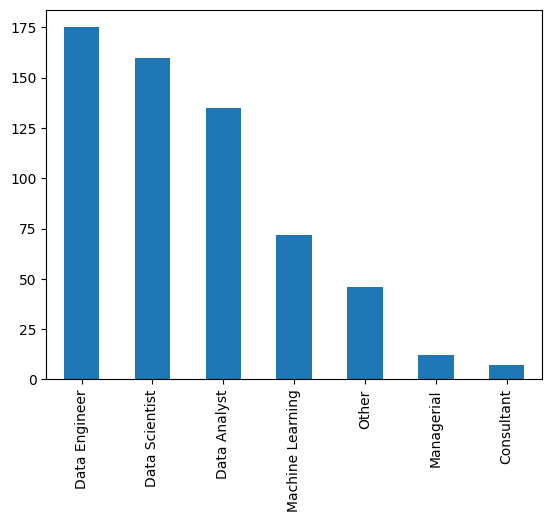

In [14]:
df.plot(kind='bar')

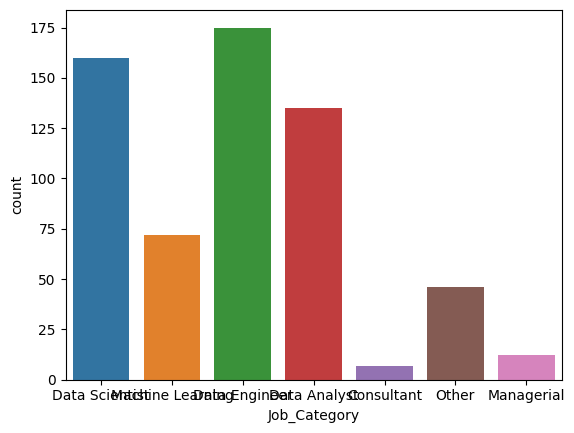

In [15]:
sns.countplot(data=salaries, x='Job_Category')
plt.show()

### Working with Numerical data

In [19]:
salaries.head(1)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Data Scientist


In [17]:
salaries.dtypes

Working_Year              int64
Designation              object
Experience               object
Employment_Status        object
Employee_Location        object
Company_Size             object
Remote_Working_Ratio      int64
Salary_USD              float64
Job_Category             object
dtype: object

In [18]:
salaries.groupby('Experience')['Salary_USD'].std()

Experience
Entry         42390.355189
Executive    111783.576779
Mid           61014.876754
Senior        55086.264071
Name: Salary_USD, dtype: float64

In [23]:
salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())
salaries['std_dev']

0      61014.876754
1      55086.264071
2      55086.264071
3      61014.876754
4      55086.264071
           ...     
602    55086.264071
603    55086.264071
604    55086.264071
605    55086.264071
606    61014.876754
Name: std_dev, Length: 607, dtype: float64

In [24]:
salaries[['Experience', 'std_dev']].value_counts()

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
dtype: int64

## 3. Relationships in Data

In [4]:
divorce = pd.read_csv(r'C:\Github\Learning\Datasets\EDA\divorce.csv', parse_dates=['divorce_date', 'marriage_date'])
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [39]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [40]:
divorce['marriage_month'] = divorce['marriage_date'].dt.month

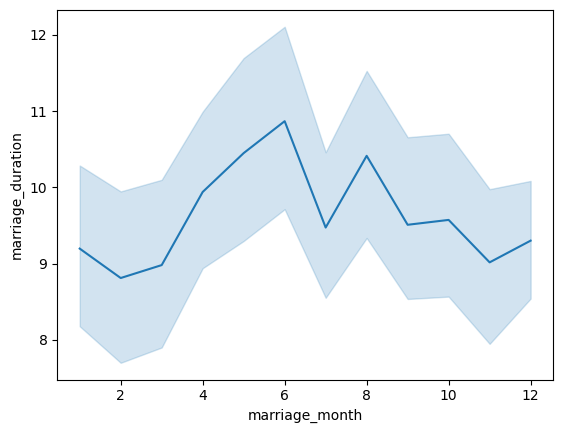

In [42]:
sns.lineplot(data=divorce, x='marriage_month', y='marriage_duration')
plt.show()

C:\Users\M0201420\AppData\Local\Temp\ipykernel_11292\3831195777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(divorce.corr(), annot=True)


<Axes: >

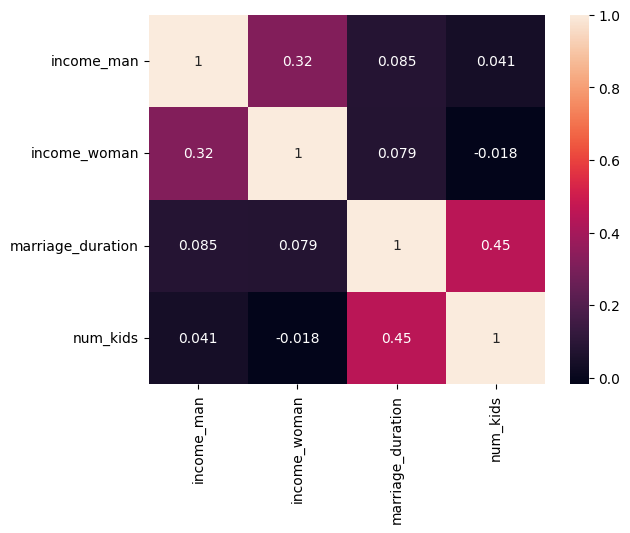

In [5]:
sns.heatmap(divorce.corr(), annot=True)

<Axes: xlabel='income_man', ylabel='income_woman'>

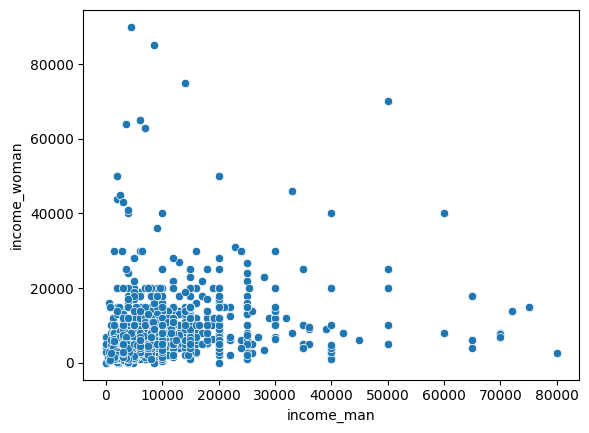

In [6]:
sns.scatterplot(data=divorce, x='income_man', y='income_woman')

c:\Users\M0201420\Anaconda3\envs\test_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


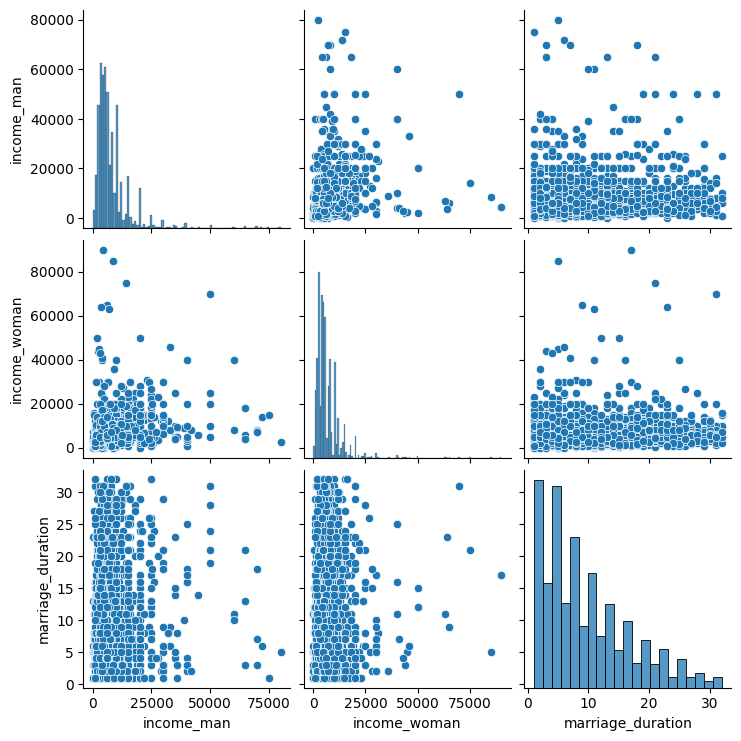

In [9]:
sns.pairplot(data=divorce, vars=['income_man', 'income_woman', 'marriage_duration'])

<Axes: xlabel='marriage_duration', ylabel='Count'>

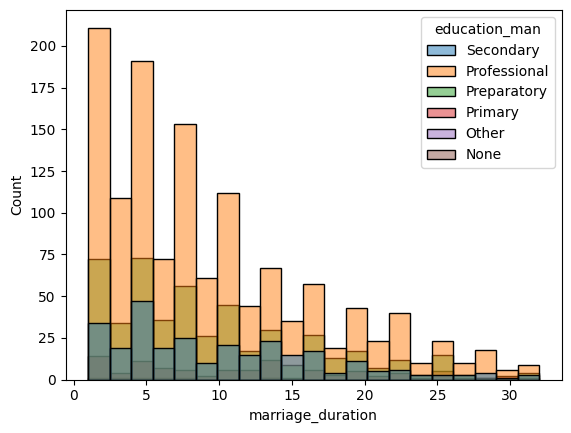

In [10]:
sns.histplot(data=divorce,x='marriage_duration', hue='education_man')

<Axes: xlabel='marriage_duration', ylabel='Density'>

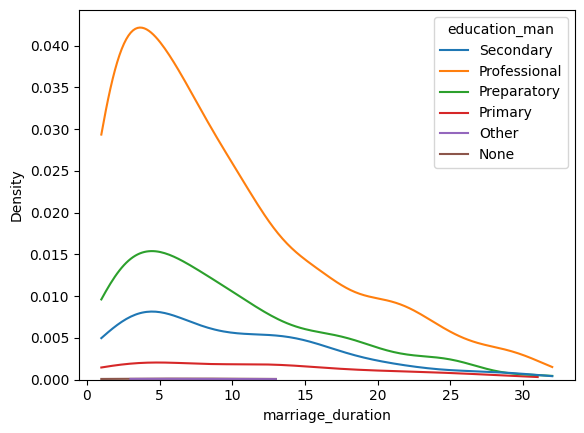

In [12]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0)

# cut=0, because it's impossible to have a duration less than 0

## 4. Turning EDA into action

### Generating new features

* For date variables, we can extract month, weekday, etc.
* Create categories for certain ranges of a variable

In [ ]:
pd.cut(data, labels, bins) # to map into categories

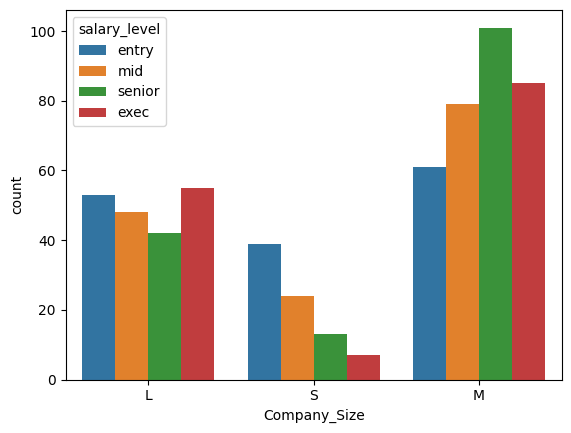

In [22]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].quantile(0.5)

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)


#---

# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

### Generating hypothesis